In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


MNIST is a dataset containing handwritten digits.

Our job: To accept as input an image and then classify wat digit it is.

It is a Multi class classification Prob since there are 10 digits from 0,1,2,...,9.


Each image is of the same size 28 x 28 = 784 pixels (grayscale).

In [3]:
# Load the data
mnist = tf.keras.datasets.mnist

In [4]:
(x_train, y_train) , (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [8]:
y_test.shape

(10000,)

In [9]:
x_train, x_test = x_train/255.0 , x_test/255.0

In [10]:
x_train.shape

(60000, 28, 28)

In [13]:
# x_train -> shape is N x 28 x 28
# y_train -> shape is N i.e. 1D vector
# x_test -> shape is Ntest x 28 x 28
# y_test -> shape is Ntest

In [14]:
# Build our model
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape = (28,28)),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10, activation='softmax')
])

In [19]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [20]:
# Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2959 - accuracy: 0.9127 - val_loss: 0.1470 - val_accuracy: 0.9547
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1462 - accuracy: 0.9569 - val_loss: 0.1021 - val_accuracy: 0.9692
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1093 - accuracy: 0.9669 - val_loss: 0.0924 - val_accuracy: 0.9709
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0893 - accuracy: 0.9722 - val_loss: 0.0828 - val_accuracy: 0.9746
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0756 - accuracy: 0.9763 - val_loss: 0.0767 - val_accuracy: 0.9754
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0653 - accuracy: 0.9792 - val_loss: 0.0723 - val_accuracy: 0.9786
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0576 - accuracy: 0.9815 - val_loss: 0.0723 - val_accuracy:

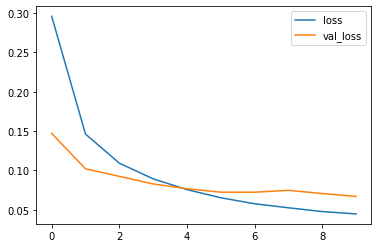

In [21]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

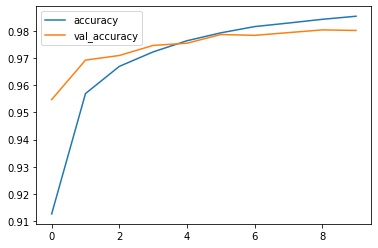

In [22]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend();

Accuracy is pretty high, almost between 97-98%.

In [23]:
# Evaluate the model
print(model.evaluate(x_test,y_test))

313/313 [==============================] - 0s 912us/step - loss: 0.0669 - accuracy: 0.9801
[0.06691594421863556, 0.9800999760627747]


Confusion matrix, without normalization
[[ 972    0    1    1    1    0    1    1    2    1]
 [   0 1124    3    1    0    0    2    1    4    0]
 [   5    1 1010    5    1    0    2    4    4    0]
 [   0    0    3  987    0    5    0    4    9    2]
 [   0    0    4    0  965    0    1    1    2    9]
 [   2    0    0    9    1  871    2    1    4    2]
 [   5    3    0    1    7    9  931    0    2    0]
 [   1    2   10    3    1    0    0 1005    2    4]
 [   5    0    3    3    5    1    1    4  950    2]
 [   3    3    0    4    6    2    0    2    3  986]]


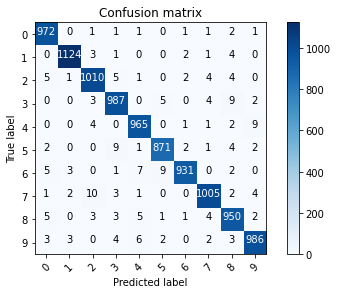

In [24]:
# Plot confusion matrix
# Kindly dont focus on the details of implementation of the code below
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc. 

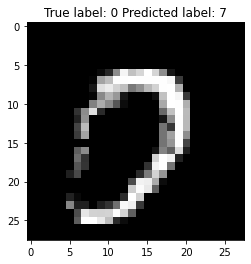

In [32]:
misclassified_img = np.where(p_test!=y_test)[0]
i = np.random.choice(misclassified_img)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted label: %s" %(y_test[i],p_test[i]));

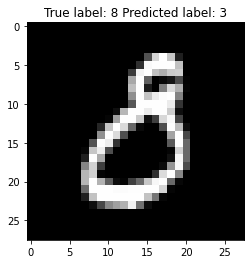

In [34]:
misclassified_img = np.where(p_test!=y_test)[0]
i = np.random.choice(misclassified_img)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted label: %s" %(y_test[i],p_test[i]));

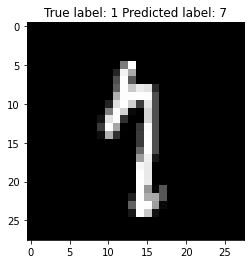

In [36]:
misclassified_img = np.where(p_test!=y_test)[0]
i = np.random.choice(misclassified_img)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted label: %s" %(y_test[i],p_test[i]));

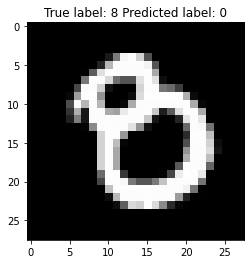

In [37]:
misclassified_img = np.where(p_test!=y_test)[0]
i = np.random.choice(misclassified_img)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted label: %s" %(y_test[i],p_test[i]));